In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from basicFunctions import get_data
from basicFunctions import get_thresholds
import time
from plot_script_functions import get_dataVersion2
from plot_script_functions import pseudo_potential
from plot_script_functions import find_minima
#import matplotlib.font_manager
import matplotlib.patches as mpatches
import json
import os
from matplotlib.patches import Patch,FancyArrowPatch
from matplotlib.lines import Line2D


matplotlib.font_manager._rebuild()


In [3]:
#matplotlib.rcParams['font.family'] = 'serif'
#matplotlib.rcParams['font.serif'] = 'Times New Roman'


# Figure 1E


In [4]:
N0 = 500
D0 = 1000
I0= 200
kc = 5e-4
kt=5e-5 
nI=2
lambdaN=2
lambdaD=0
y = 0.1
y_I = 0.5

NR = 5000#5139
NS = 500#567
DS = 1500#1561
DR = 0#22
IS = 0#1
IR = 800#802

NA = 0.5*(NS+NR)
DA = 0.5*(DS+DR)
IA = 0.5*(IS+IR)

In [5]:
def H_tmp(X,X0,nX,lambdY):
        return lambdY+(1.0 - lambdY)/(1.0+(X/X0)**nX)


In [6]:
N1A,N2A,N3A,N4A = N0*H_tmp(IA,I0,nI,lambdaN),kt*NA*DA,kc*NA*DA,y*NA
D1A,D2A,D3A,D4A = D0*H_tmp(IA,I0,nI,lambdaD),kt*DA*NA,kc*DA*NA,y*DA
I1A,I2A = kt*NA*DA,y_I*IA

with open("../../gillespie_phaseTransitions/gill_intrinsic.json") as json_file:
    data = json.load(json_file)
Dext = data['Dext']
Next = data['Next']
prob = data['prob']
Nstd = data['Nstd']
Dstd = data['Dstd']    
    
ind = np.argwhere(Nstd['freq']==np.max(Nstd['freq']))[:,0][0]
GillN= Nstd['bins'][ind]

ind = np.argwhere(Dstd['freq']==np.max(Dstd['freq']))[:,0][0]
GillD= Dstd['bins'][ind]

In [7]:
resSB=[]
for noise in np.arange(0,21):
    filen = "../../oneCell/res_1cell/traj_1x1_shot_n"+str(noise)+"_NE5000_DE0.json"
    with open(filen) as jsonfile:
        data =json.load(jsonfile)

    resSB +=[(data['Dstd']+data['Nstd'])*1./2.]
    print noise,resSB[-1]

0 2.14101360314e-11
1 99.962164239
2 199.988403955
3 300.075635993
4 400.32258593
5 500.825077671
6 601.658216735
7 702.898994194
8 804.600753303
9 906.821279779
10 1009.61440525
11 1113.0277467
12 1217.10105957
13 1321.87782372
14 1427.39579666
15 1533.68867393
16 1640.78000917
17 1748.68945502
18 1857.43833294
19 1967.04174514
20 2077.50289398


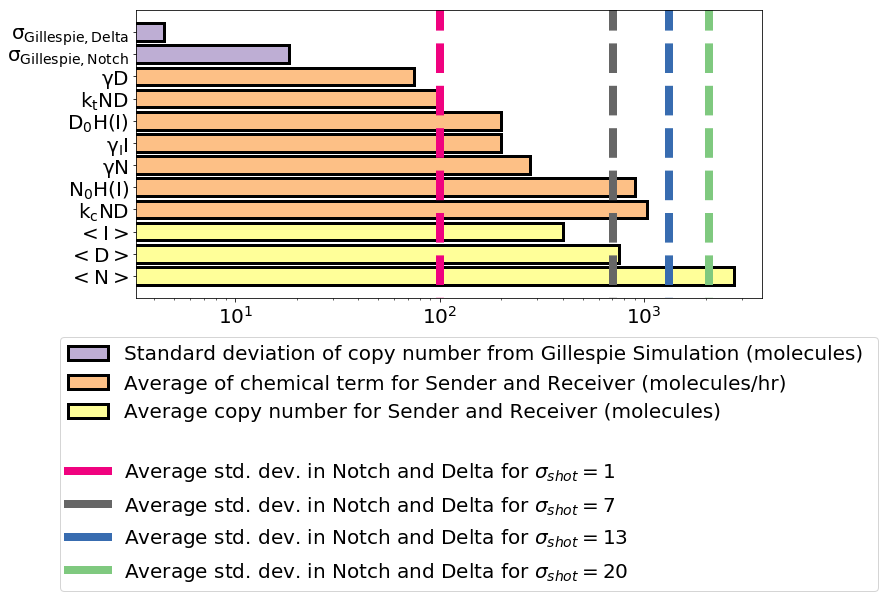

In [10]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1,1)#,width_ratios=[1,0.5,1])#,height_ratios=[0.2,0.8,0.4,0.8,0.3,0.8,1])
gs1.update(left=0.05, right=1.5, wspace=0.05,hspace=0.05,top=1,bottom=0)
fs = 20
plt.rcParams['font.size']=fs
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({"text.usetex": True,"font.family": "serif","font.serif": ["Times New Roman"]})
c1,c2,c3,c4,c5,c6,c7=['#ffff99','#fdc086','#beaed4','#f0027f','#666666','#386cb0','#7fc97f']

ax1 = plt.subplot(gs1[0,0])
ax1.barh('$\mathrm{<}$N$\mathrm{>}$',NA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{<}$D$\mathrm{>}$',DA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{<}$I$\mathrm{>}$',IA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{k_c}$ND',N3A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('N$\mathrm{_0}$H(I)',N1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{\gamma N}$',N4A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{\gamma_I}$I',I2A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('D$\mathrm{_0}$H(I)',D1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{k_t}$ND',I1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{\gamma}$D',D4A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{\sigma_{Gillespie,Notch}}$',GillN,color=c3,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\mathrm{\sigma_{Gillespie,Delta}}$',GillD,color=c3,edgecolor='k',alpha=1,linewidth=3)
ax1.set_xscale('log')
ax1.set_ylim(-1,12)

legend_elements = [Patch(facecolor=c3,edgecolor='k',lw=3,label='Standard deviation of copy number from Gillespie Simulation (molecules) '),
                    Patch(facecolor=c2,edgecolor='k',lw=3,label='Average of chemical term for Sender and Receiver (molecules/hr)'),
                    Patch(facecolor=c1,edgecolor='k',lw=3,label='Average copy number for Sender and Receiver (molecules)')]
legend_elements+=[Patch(facecolor='w',label='')]

colors=[c4,c5,c6,c7]
slist=[1,7,13,20]#np.arange(1,21)#[5,6,14,15]
for i in range(len(slist)):
        ax1.vlines(resSB[slist[i]],-10,20,color=colors[i%len(colors)],lw=8,label=slist[i],linestyle='--')
        legend_elements+=[Line2D([0],[0],color=colors[i%len(colors)],lw=8,label="Average std. dev. in Notch and Delta for $\sigma_{shot}=$"+str(slist[i]))]
ax1.legend(handles=legend_elements,bbox_to_anchor=(1.2,-0.1))

#ax1.fill_between([10,200],-10,100,facecolor='black',alpha=0.2)
#ax1.fill_between([1000,4000],-10,100,facecolor='black',alpha=0.2)
fig.savefig("Figure1E.eps",bbox_inches='tight',format='eps',dpi=300)

## Figure 2

random patterns initial and final

similarity vs time with S&P

S vs dev, S vs mistakes -- make sure to get the averages now

include patterns ?


-- main focus on how specific initial conditions effects patterning


In [8]:
def getrandPatt():
    df = pd.read_csv("data/fig2a.txt",header=0)
    rm,cm = np.max(df['row'])+1,np.max(df['column'])+1
    return  np.reshape(df['Initial'].values,(rm,cm)), np.reshape(df['Final'].values,(rm,cm))

In [9]:
def getCheckPatt():
    df = pd.read_csv("data/fig2b.txt",header=0)
    rm,cm = np.max(df['row'])+1,np.max(df['column'])+1
    return  np.reshape(df['Initial'].values,(rm,cm)), np.reshape(df['Final'].values,(rm,cm))

In [10]:
def getSim_checkFull_det():
    df = pd.read_csv("data/fig2c.txt",header=0)
    return df['xcheck'].values,df['ycheck'].values

In [11]:
def getSim_randFull_det():
    df = pd.read_csv("data/fig2c.txt",header=0)
    return df['xrand'].values,df['yrand'].values

In [12]:
def getCont_randFull_det():
    df = pd.read_csv("data/fig2c_cont.txt",header=0)
    return df['xrand'].values,df['yrand'].values/5.12

In [13]:
def getCont_checkFull_det():
    df = pd.read_csv("data/fig2c_cont.txt",header=0)
    return df['xcheck'].values,df['ycheck'].values/5.12

In [14]:
def getMist_det():
    df = pd.read_csv("data/fig2d.txt",header=0)
    return df['x'].values,df['y'].values,df['yerr'].values

In [15]:
def getDev_det():
    df = pd.read_csv("data/fig2e.txt",header=0)
    return df['x'].values,df['y'].values,df['yerr'].values

[0.    0.005 0.01  0.025 0.1   1.    1.5   2.    5.   ]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


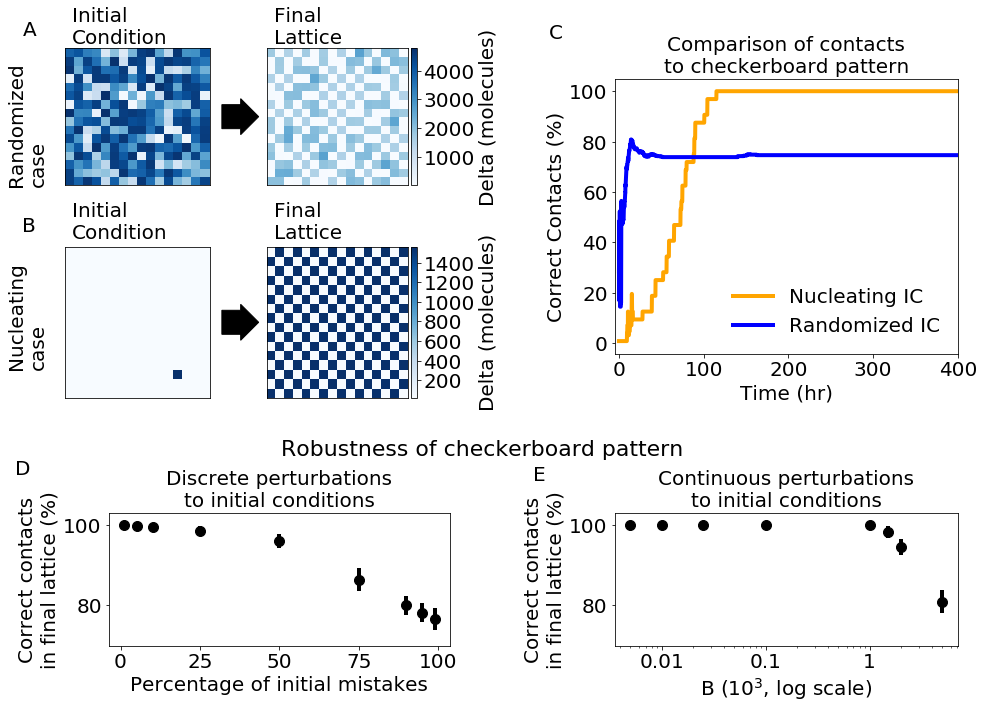

In [33]:
fig = plt.figure(figsize=(16,11))
al,bl,cl=1.4,0.5,0.05
dl=0.8
gs1 = gridspec.GridSpec(7, 13,width_ratios=[0.4,1.,bl,al,cl,0.3,0.7,0.7,0.1,0.6,0.8,bl,al],height_ratios=[0.2,0.8,0.4,0.8,0.3,0.8,1])
gs1.update(wspace=0.05,hspace=0.05)
fs = 20
plt.rcParams['font.size']=fs

'''
A 0:2, [0,2,3]

B 3:5, [0,2,3]

C 1:4, 7:10

D 6, 0:4
E 6, 5:10
'''

# A # initial: pattern for s&p, pattern for random
axa1 = plt.subplot(gs1[0:2, 0:2])
axa2 = plt.subplot(gs1[0:2, 3])
cbax1a=plt.subplot(gs1[0:2,4])
pattIr,pattFr = getrandPatt()
vmin = [np.min(pattIr),np.min(pattFr)]
vmax = [np.max(pattIr),np.max(pattFr)]
vmin=np.min(vmin)
vmax=np.max(vmax)
axa1.pcolormesh(pattIr,cmap='Blues',vmin=vmin, vmax=vmax)
a1a=axa2.pcolormesh(pattFr,cmap='Blues',vmin=vmin, vmax=vmax)
axa1.text(-0.4, 0.9, 'Randomized\ncase',rotation=90,transform=axa1.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
axa1.text(0.05, 1.3, 'Initial\nCondition',transform=axa1.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
axa2.text(0.05, 1.3, 'Final\nLattice',transform=axa2.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
t = axa2.text(-3.5, 8, "    ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
axa1.set_xticks([])
axa1.set_yticks([])
axa2.set_xticks([])
axa2.set_yticks([])
axa1.text(-0.2, 1.2, 'A',transform=axa1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=20)
cb = matplotlib.colorbar.Colorbar(ax = cbax1a, mappable = a1a)
cb.set_label(r'Delta (molecules)')#, labelpad=10)

# B # final: pattern for s&p, pattern for random
axb1 = plt.subplot(gs1[3:5, 0:2])
axb2 = plt.subplot(gs1[3:5, 3])
cbax1b=plt.subplot(gs1[3:5,4])
pattIc,pattFc = getCheckPatt()
vmin = [np.min(pattIc),np.min(pattFc)]
vmax = [np.max(pattIc),np.max(pattFc)]
vmin=np.min(vmin)
vmax=np.max(vmax)
axb1.pcolormesh(pattIc,cmap='Blues',vmin=vmin, vmax=vmax)
a1b=axb2.pcolormesh(pattFc,cmap='Blues',vmin=vmin, vmax=vmax)
axb1.text(-0.4, 0.9, 'Nucleating\ncase',rotation=90,transform=axb1.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
axb1.text(0.05, 1.3, 'Initial\nCondition',transform=axb1.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
axb2.text(0.05, 1.3, 'Final\nLattice',transform=axb2.transAxes,verticalalignment='top', horizontalalignment='left',color='black', fontsize=20)
t = axb2.text(-3.5, 8, "    ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
axb1.set_xticks([])
axb1.set_yticks([])
axb2.set_xticks([])
axb2.set_yticks([])
axb1.text(-0.2, 1.2, 'B',transform=axb1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=20)
cb = matplotlib.colorbar.Colorbar(ax = cbax1b, mappable = a1b)
cb.set_label(r'Delta (molecules)')#, labelpad=10)

axc = plt.subplot(gs1[1:4,9:13])# C # Similarity for s&P and random
x,y=getCont_checkFull_det()
axc.plot(x,y,label='Nucleating IC',color='orange',linewidth=4)
x,y=getCont_randFull_det()
axc.plot(x,y,label='Randomized IC',color='blue',linewidth=4)
axc.set_xlim(-5,400)
axc.set_xlabel("Time (hr)")
axc.set_ylabel("Correct Contacts (%)")
axc.set_title("Comparison of contacts\nto checkerboard pattern",fontsize=fs)
axc.legend(frameon=False)
axc.text(-0.15, 1.2, 'C',transform=axc.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=20)


# D # similarity v mistakes
axd = plt.subplot(gs1[6, 1:6])
x,y,yerr=getMist_det()
axd.errorbar(x,y,yerr=yerr,linestyle='',marker='o',color='k',markersize=10,linewidth=4)
axd.set_xlabel("Percentage of initial mistakes")
axd.set_ylabel("Correct contacts\nin final lattice (%)")
axd.set_title("Discrete perturbations\nto initial conditions",fontsize=fs)
axd.set_ylim(70,103)
axd.text(-0.23, 1.4, 'D',transform=axd.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=20)

# E # similarity v devs
axe = plt.subplot(gs1[6, 9:13])
x,y,yerr=getDev_det()
print x
axe.errorbar(x,y,yerr=yerr,linestyle='',marker='o',color='k',markersize=10,linewidth=4)
axe.set_xlabel("B ($10^3$, log scale)")
axe.set_ylabel("Correct contacts\nin final lattice (%)")
axe.set_title("Continuous perturbations\nto initial conditions",fontsize=fs)
axe.set_xscale('log')
print axe.get_xticks()
axe.set_xticklabels([0.0001,0.001,0.01,0.1,1,10,100])
axe.set_ylim(70,103)
axe.text(-0.2, 1.35, 'E',transform=axe.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=20)

axe.text(0.2, 1.55, 'Robustness of checkerboard pattern',transform=axe.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=22)


fig.savefig("Figure2.eps",format='eps',bbox_inches='tight',dpi=300)

## Fig 3: Intro to noise

In [17]:
def getSim_randFull_noise():
    df = pd.read_csv("data/fig4ef-opt2.txt")
    return [df['time'].values,df['white0'].values,df['shot0'].values,df['white50'].values,df['white130'].values,df['white200'].values,df['shot5'].values,df['shot13'].values,df['shot20'].values]

In [18]:
def getCont_randFull_noise():
    df = pd.read_csv("data/fig4ef.txt")
    return [df['time'].values,df['white0'].values,df['shot0'].values,df['white50'].values,df['white130'].values,df['white200'].values,df['shot5'].values,df['shot13'].values,df['shot20'].values]

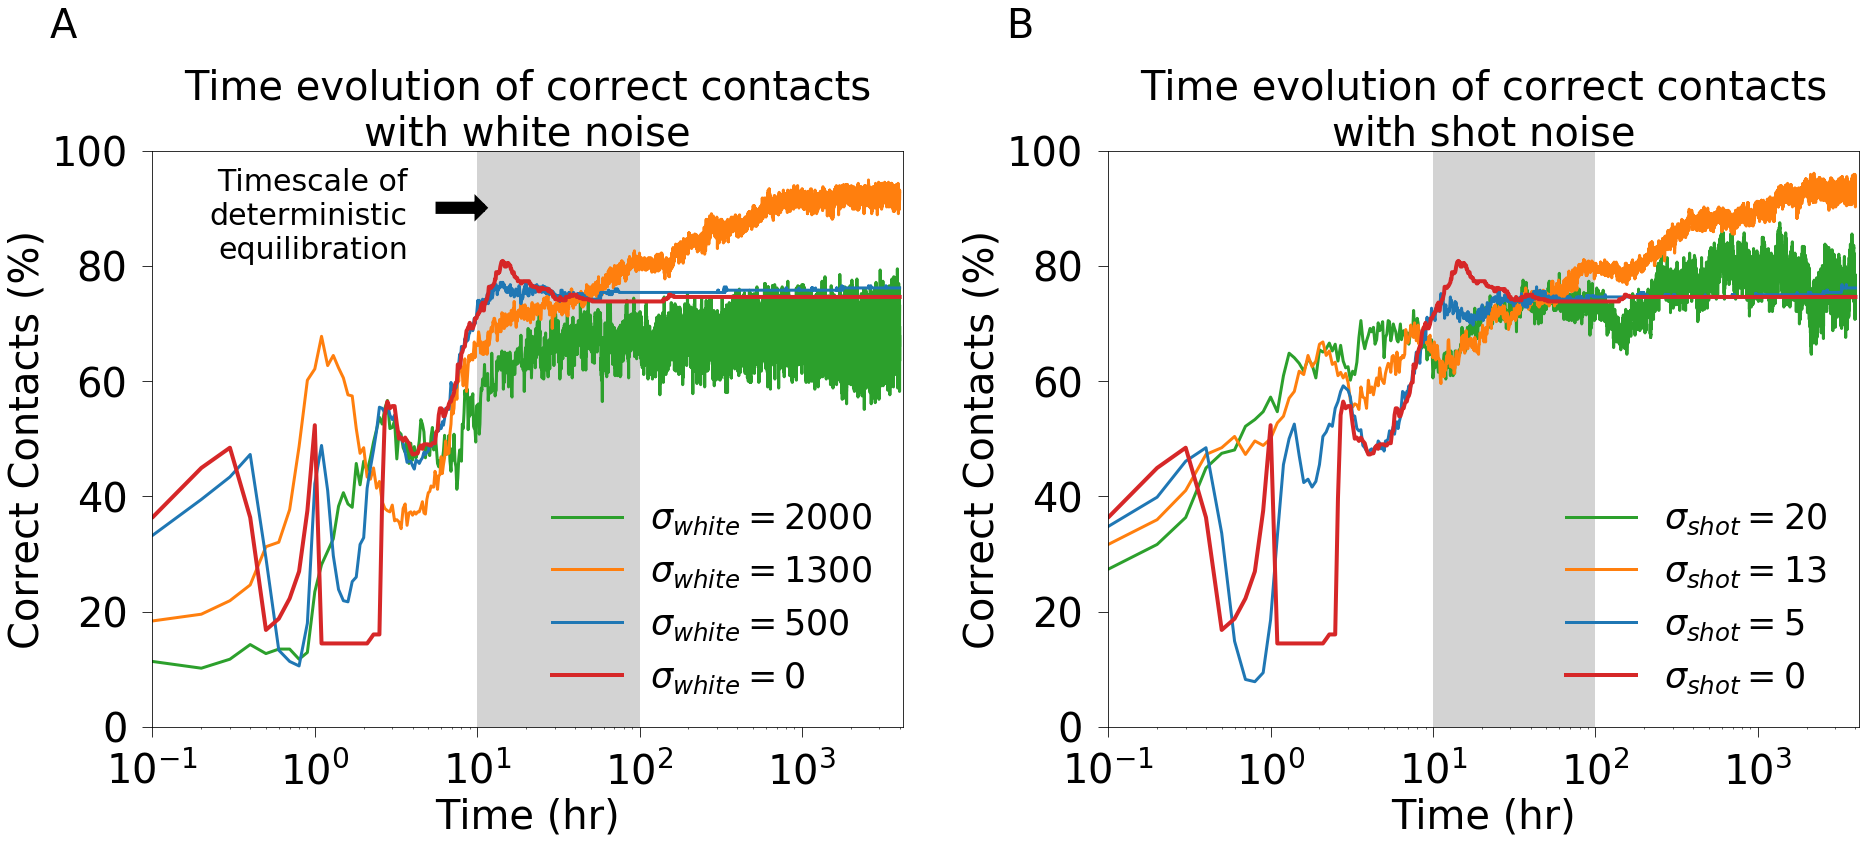

In [19]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 3, width_ratios=[1,0.2,1], height_ratios=[1.])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})


ax1a = plt.subplot(gs1[0, 0])
ax2a = plt.subplot(gs1[0, 2])

ax1a.fill_between([10,100],[100],facecolor='lightgray')
ax2a.fill_between([10,100],[100],facecolor='lightgray')
st = "  "
for i in range(10):
    st+="      "
ax1a.text(6,90, st, size=2, rotation = 0,bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=10))
ax1a.text(0.34, 0.97, "Timescale of\ndeterministic\nequilibration",transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=30)

[x,n0w,n0s,n50,n130,n200,n5,n13,n20]=getCont_randFull_noise()
ax1a.plot(x,n200,label='$\sigma_{white}=2000$',linewidth=3,color='tab:green')
ax1a.plot(x,n130,label='$\sigma_{white}=1300$',linewidth=3,color='tab:orange')
ax1a.plot(x,n50,label='$\sigma_{white}=500$',linewidth=3,color='tab:blue')
ax1a.plot(x,n0w,label='$\sigma_{white}=0$',linewidth=4,color='tab:red')
ax2a.plot(x,n20,label='$\sigma_{shot}=20$',linewidth=3,color='tab:green')
ax2a.plot(x,n13,label='$\sigma_{shot}=13$',linewidth=3,color='tab:orange')
ax2a.plot(x,n5,label='$\sigma_{shot}=5$',linewidth=3,color='tab:blue')
ax2a.plot(x,n0s,label='$\sigma_{shot}=0$',linewidth=4,color='tab:red')

ax1a.legend(fontsize=35,frameon=False)#loc='upper left',
ax2a.legend(fontsize=35,frameon=False)

ax1a.set_ylim(0.,100)
ax2a.set_ylim(0.,100)
####ax2a.set_ylim(0.37,0.95)
ax1a.set_xlim(xmin=0.1)
ax2a.set_xlim(xmin=0.1)
ax1a.set_xscale("log")
ax2a.set_xscale("log")
ax1a.tick_params(pad=15,length=10)
ax2a.tick_params(pad=15,length=10)

ax1a.set_xlabel("Time (hr)")
ax2a.set_xlabel("Time (hr)")

ax1a.set_ylabel("Correct Contacts (%)")
ax2a.set_ylabel("Correct Contacts (%)")

ax1a.set_title("Time evolution of correct contacts\nwith white noise",fontsize=fs)
ax2a.set_title("Time evolution of correct contacts\nwith shot noise",fontsize=fs)


ax1a.text(-0.1, 1.25, 'A',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax2a.text(-0.1, 1.25, 'B',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


fig.savefig("Figure3.eps",format='eps',bbox_inches='tight',dpi=300)

## Fig 4: Noise in patterning for random ICS

the figure for random showing the bump

Also include the S&P results here but none of the other stuff

In [20]:
def get_pseudo_A():
    df = pd.read_csv("data/fig3a.txt",header=0)
    xlim=df['xlim'].values[:2]
    ylim=df['ylim'].values[:2]
    xmin=df['xminima'].values[:2]
    ymin=df['yminima'].values[:2]
    N = np.unique(df['N'].values)
    D = np.unique(df['D'].values)
    lN = len(N)
    lD = len(D)
    U = np.reshape(df['U'].values,(lN,lD))
    return [N,D,U,xlim,ylim,xmin,ymin]

In [21]:
def get_pseudo_B():
    df = pd.read_csv("data/fig3b.txt",header=0)
    xlim=df['xlim'].values[:2]
    ylim=df['ylim'].values[:2]
    xmin=df['xminima'].values[:2]
    ymin=df['yminima'].values[:2]
    N = np.unique(df['N'].values)
    D = np.unique(df['D'].values)
    lN = len(N)
    lD = len(D)
    U = np.reshape(df['U'].values,(lN,lD))
    return [N,D,U,xlim,ylim,xmin,ymin]

In [22]:
def get_pseudo_C():
    df = pd.read_csv("data/fig3c.txt",header=0)
    xlim=df['xlim'].values[:2]
    ylim=df['ylim'].values[:2]
    xmin=df['xminima'].values[:2]
    ymin=df['yminima'].values[:2]
    N = np.unique(df['N'].values)
    D = np.unique(df['D'].values)
    lN = len(N)
    lD = len(D)
    U = np.reshape(df['U'].values,(lN,lD))
    return [N,D,U,xlim,ylim,xmin,ymin]

In [23]:
def getContactsSP():

    df = pd.read_csv("data/fig3d.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

In [24]:
def getSimSP():

    df = pd.read_csv("data/fig3d2.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

In [25]:
def getContacts_rand():

    df = pd.read_csv("data/fig3e.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

In [26]:
def getSim_rand():

    df = pd.read_csv("data/fig3e2.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

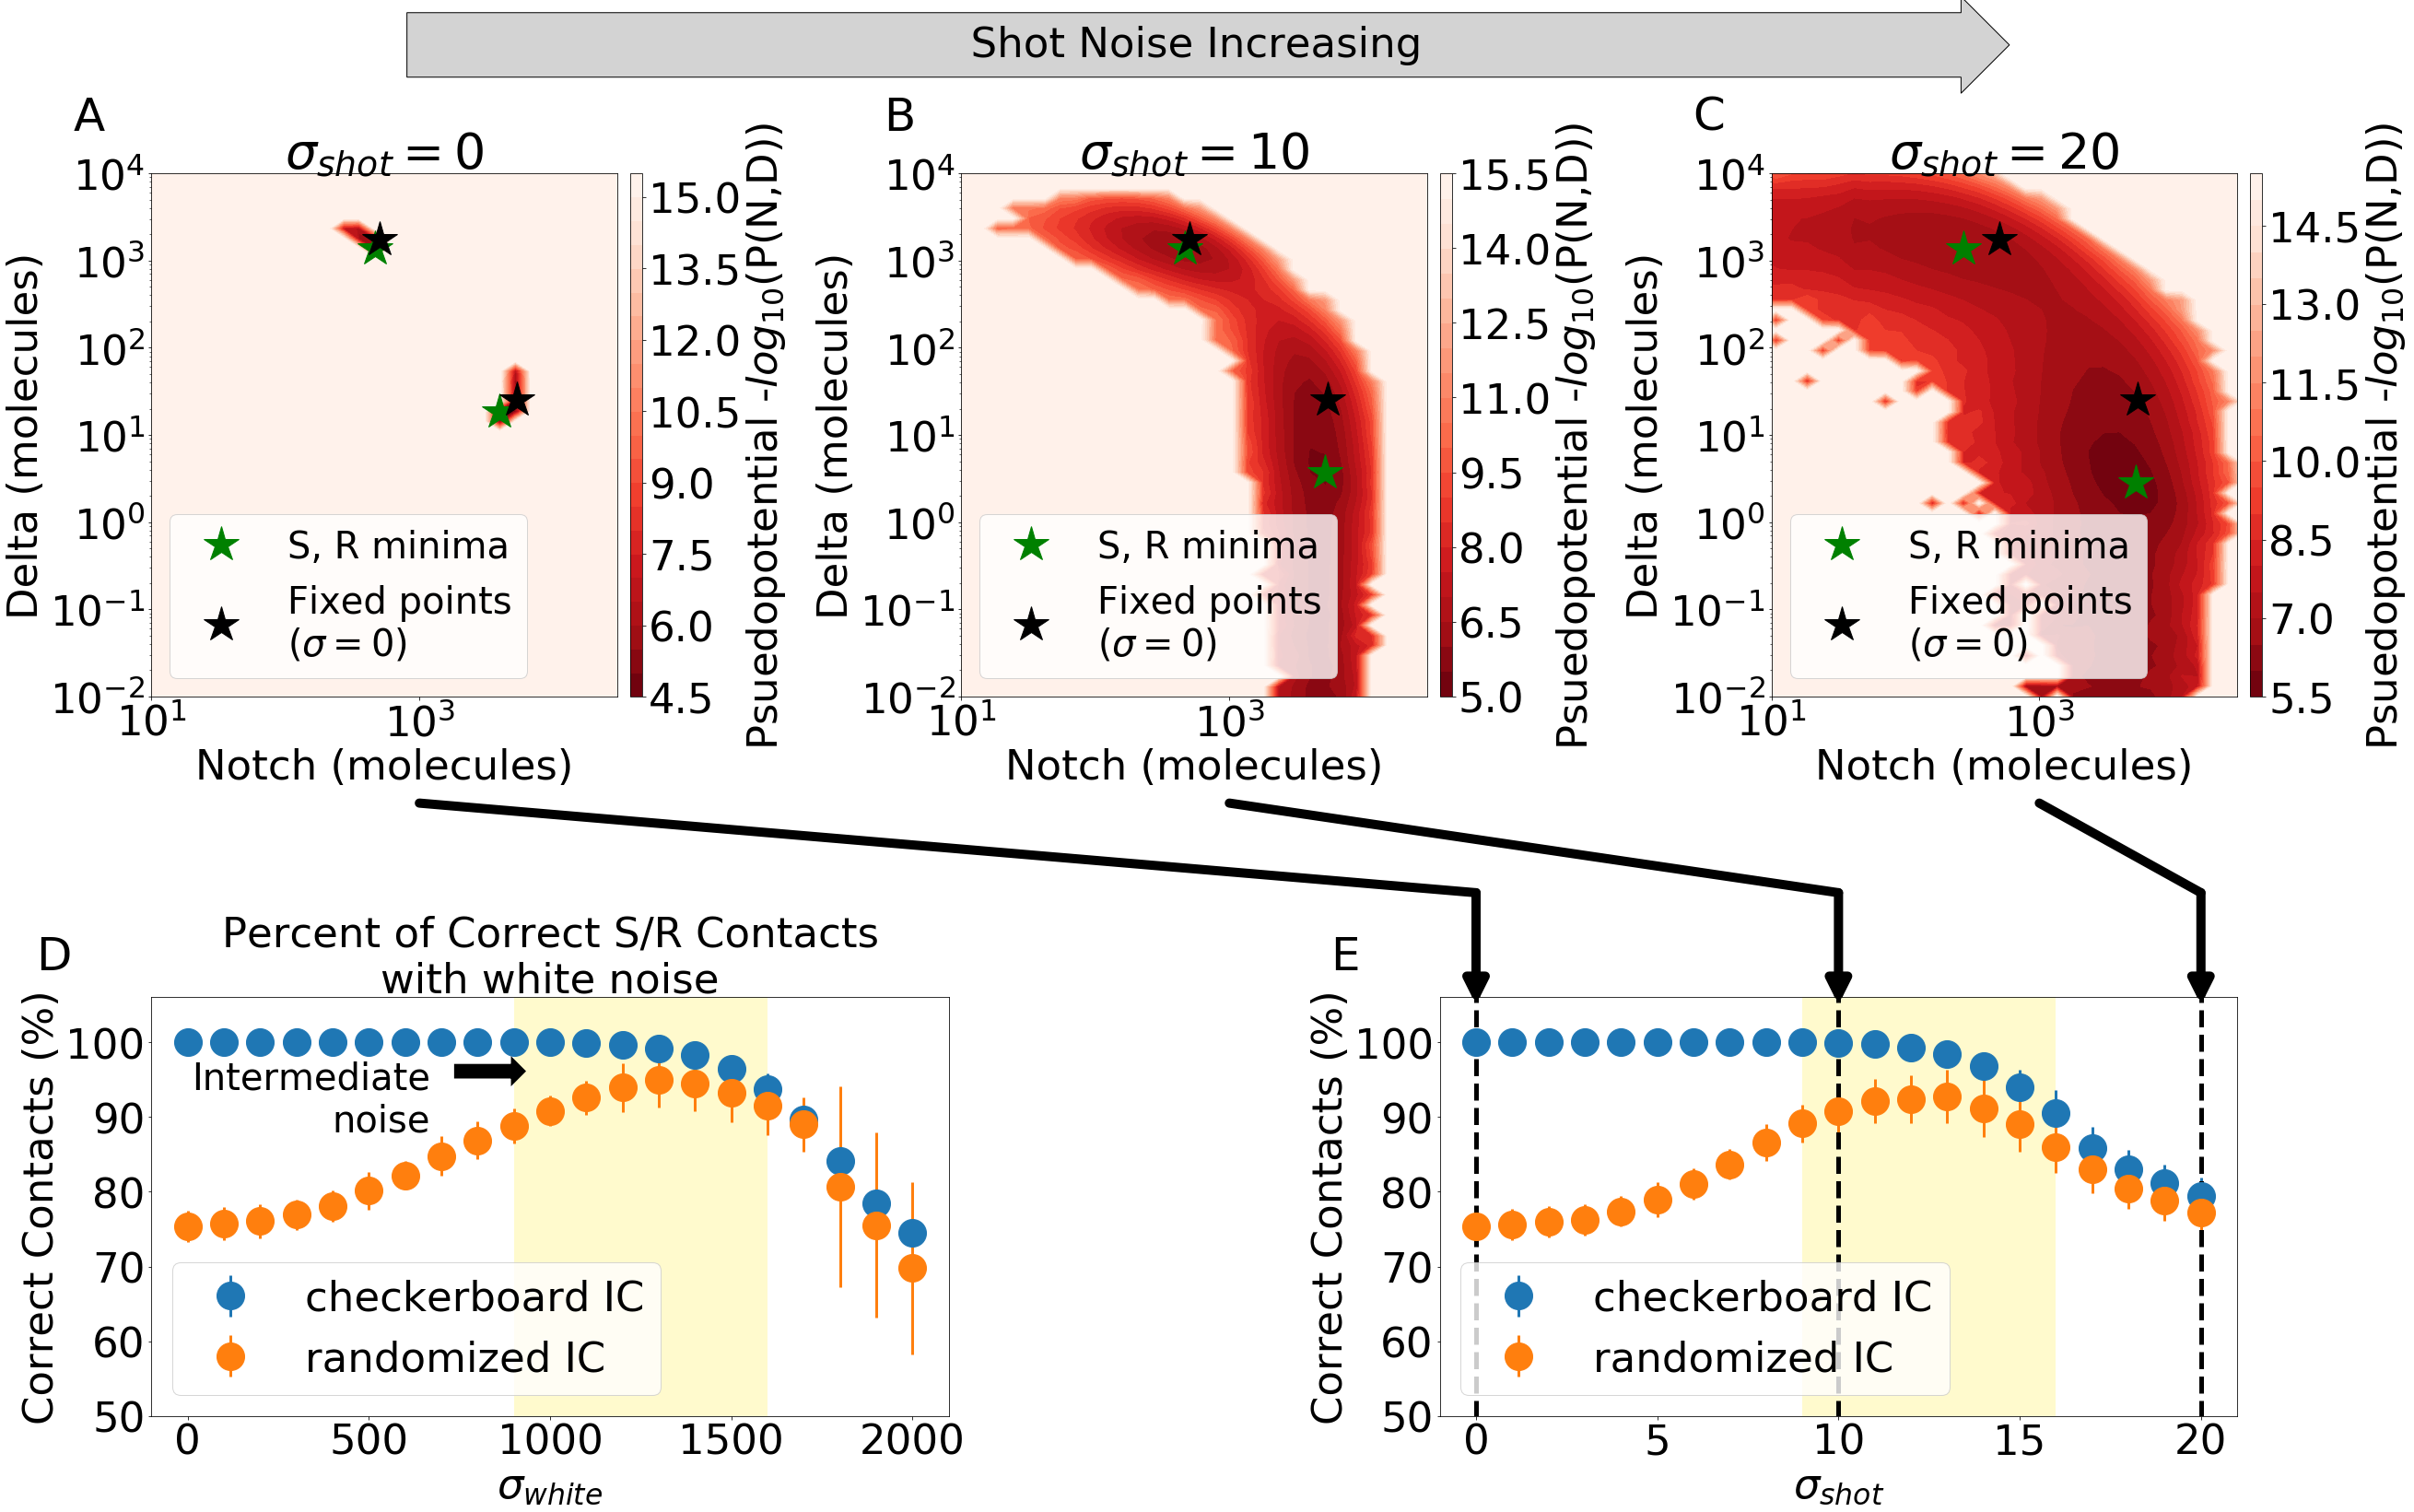

In [27]:
fig = plt.figure()
gs1 = gridspec.GridSpec(5, 9,width_ratios=[1.9,0.05,1.2,1.9,0.05,1.2,1.9,0.05,1.],height_ratios=[1.5,0.8,1.2,0.5,1.2])
gs1.update(left=0.05, right=6, wspace=0.05,hspace=0.03,top=7,bottom=0)
fs=45
matplotlib.rcParams.update({'font.size': fs})

### psuedopotential
ax0a = plt.subplot(gs1[0,0])
cbaxa = plt.subplot(gs1[0,1])
[N,D,U,xlim,ylim,x_minima,y_minima]=get_pseudo_A()
a0a=ax0a.contourf(N, D, U, 21, cmap='Reds_r')
ax0a.plot(x_minima,y_minima, 'g*', markersize=40, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxa, mappable = a0a)
cb.set_label('Psuedopotential -$log_{10}$(P(N,D))')
ax0a.plot([505, 5385], [1758, 25], 'k*', markersize=40, label='Fixed points\n($\\sigma=0$)')
ax0a.set_xlim(xlim)
ax0a.set_ylim(ylim)
ax0a.set_xlabel('Notch (molecules)')
ax0a.set_ylabel('Delta (molecules)')
ax0a.set_xscale('log')
ax0a.set_yscale('log')
title= '$\\sigma_{shot}=$0'
ax0a.set_title(title)
ax0a.legend(loc='lower left',fontsize=40)

ax0b = plt.subplot(gs1[0,3])
cbaxb = plt.subplot(gs1[0,4])
[N,D,U,xlim,ylim,x_minima,y_minima]=get_pseudo_B()
a0b=ax0b.contourf(N, D, U, 21, cmap='Reds_r')
ax0b.plot(x_minima,y_minima, 'g*', markersize=40, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxb, mappable = a0b)
cb.set_label('Psuedopotential -$log_{10}$(P(N,D))')
ax0b.plot([505, 5385], [1758, 25], 'k*', markersize=40, label='Fixed points\n($\\sigma=0$)')
ax0b.set_xlim(xlim)
ax0b.set_ylim(ylim)
ax0b.set_xlabel('Notch (molecules)')
ax0b.set_ylabel('Delta (molecules)')
ax0b.set_xscale('log')
ax0b.set_yscale('log')
title= '$\\sigma_{shot}=$10'
ax0b.set_title(title)
ax0b.legend(loc='lower left',fontsize=40)

### psuedopotential
ax0c = plt.subplot(gs1[0,6])
cbaxc = plt.subplot(gs1[0,7])
[N,D,U,xlim,ylim,x_minima,y_minima]=get_pseudo_C()
a0c=ax0c.contourf(N, D, U, 21, cmap='Reds_r')
ax0c.plot(x_minima,y_minima, 'g*', markersize=40, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxc, mappable = a0c)
cb.set_label('Psuedopotential -$log_{10}$(P(N,D))')
ax0c.plot([505, 5385], [1758, 25], 'k*', markersize=40, label='Fixed points\n($\\sigma=0$)')
ax0c.set_xlim(xlim)
ax0c.set_ylim(ylim)
ax0c.set_xlabel('Notch (molecules)')
ax0c.set_ylabel('Delta (molecules)')
ax0c.set_xscale('log')
ax0c.set_yscale('log')
title= '$\\sigma_{shot}=$20'
ax0c.set_title(title)
ax0c.legend(loc='lower left',fontsize=40)

###
ax2a = plt.subplot(gs1[2, 0:3])
ax2b = plt.subplot(gs1[2, 4:7])

ax2a.set_xticks([])
ax2b.set_xticks([])
ax2a.set_xlabel("$\sigma_{white}$",fontsize=fs)
ax2b.set_xlabel("$\sigma_{shot}$",fontsize=fs)
ax2a.set_ylabel("Correct Contacts (%)",fontsize=fs)
ax2b.set_ylabel("Correct Contacts (%)",fontsize=fs)

xa,ya,yea,xb,yb,yeb=getContactsSP()
ax2a.errorbar(xa,ya,yerr=yea,linestyle='',marker='o',label='checkerboard IC',markersize=30,linewidth=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='checkerboard IC',markersize=30,linewidth=3)

xa,ya,yea,xb,yb,yeb=getContacts_rand()
ax2a.errorbar(xa,ya,yerr=yea,linestyle='',marker='o',label='randomized IC',markersize=30,linewidth=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='randomized IC',markersize=30,linewidth=3)

ax2b.plot([0,0],[40,110],'k--',lw=5)
ax2b.plot([10,10],[40,110],'k--',lw=5)
ax2b.plot([20,20],[40,110],'k--',lw=5)

'''
for i in range(len(xa)):
    if xa[i]==0:
        ax2a.plot([0,2000],[ya[i],ya[i]],'k--',lw=5,alpha=0.8)

for i in range(len(xb)):
    if xb[i]==0:
        ax2b.plot([0,20],[yb[i],yb[i]],'k--',lw=5,alpha=0.8)
'''

ax2a.legend(loc='lower left')
ax2b.legend(loc='lower left')
ax2a.set_title("Percent of Correct S/R Contacts\nwith white noise",fontsize=fs)
#ax2b.set_title("Percent of Correct S/R Contacts\n with shot noise",fontsize=fs)


ax2a.set_xlim(-100,2100)
ax2b.set_xlim(-1,21)
ax2a.set_ylim(50,106)
ax2b.set_ylim(50,106)

ax2a.set_yticks([50,60,70,80,90,100])
ax2b.set_yticks([50,60,70,80,90,100])

ax2a.set_xticks([0.,500,1000,1500,2000])
ax2b.set_xticks([0.,5,10,15,20])
###
loc='upper left',
ax0a.text(-0.1, 1.15, 'A',transform=ax0a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
t=ax0a.text(1000, 500000.25, "                                          Shot Noise Increasing                                          ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="lightgray", ec="k", lw=1),rotation=0)

transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(ax0a.transData.transform([1000,0.0006]))
coord2 = transFigure.transform(ax2b.transData.transform([0,120]))
coord3 = transFigure.transform(ax2b.transData.transform([0,105]))
arrow = FancyArrowPatch(coord1,coord2,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-", mutation_scale=30, linewidth=10)
fig.patches.append(arrow)
arrow = FancyArrowPatch(coord2,coord3,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-|>", mutation_scale=50, linewidth=10)
fig.patches.append(arrow)

coord1 = transFigure.transform(ax0b.transData.transform([1000,0.0006]))
coord2 = transFigure.transform(ax2b.transData.transform([10,120]))
coord3 = transFigure.transform(ax2b.transData.transform([10,105]))
arrow = FancyArrowPatch(coord1,coord2,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-", mutation_scale=30, linewidth=10)
fig.patches.append(arrow)
arrow = FancyArrowPatch(coord2,coord3,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-|>", mutation_scale=50, linewidth=10)
fig.patches.append(arrow)

coord1 = transFigure.transform(ax0c.transData.transform([1000,0.0006]))
coord2 = transFigure.transform(ax2b.transData.transform([20,120]))
coord3 = transFigure.transform(ax2b.transData.transform([20,105]))
arrow = FancyArrowPatch(coord1,coord2,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-", mutation_scale=30, linewidth=10)
fig.patches.append(arrow)
arrow = FancyArrowPatch(coord2,coord3,shrinkA=0,shrinkB=0,transform=fig.transFigure,color="black",arrowstyle="-|>", mutation_scale=50, linewidth=10)
fig.patches.append(arrow)



ax2a.fill_between([900,1600],[106],facecolor='lemonchiffon')
ax2b.fill_between([9,16],[106],facecolor='lemonchiffon')
st = "  "
for i in range(10):
    st+="      "
ax2a.text(750,96, st, size=3, rotation = 0,bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=10))
ax2a.text(0.35, 0.85, "Intermediate\nnoise",transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=40)

ax0b.text(-0.1, 1.32, ' ',transform=ax0b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax0b.text(-0.1, 1.15, 'B',transform=ax0b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax0c.text(-0.1, 1.15, 'C',transform=ax0c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2a.text(-0.1, 1.15, 'D',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.1, 1.15, 'E',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
fig.savefig("Figure4.eps",bbox_inches='tight',format='eps',dpi=300)

## Fig 5 Stability of States

escape times correlation times, switching 

compare nucleating case to random case


initial switchs vs switches at equilibrium ??


A) initial switches for nucleating case and initial switches for random case

B) equilibrium switches for nucleating and random case
Should I just look at the eff switches and not from IR vs R?

C) Fast chemical kinetics followed by slow relaxation from noise (the q? vals or use sim for this?) for nucleating and random

In [28]:
def get_etavg_A():
    df = pd.read_csv("data/fig4a.txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [29]:
def get_etavg_B():
    df = pd.read_csv("data/fig4b.txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [30]:
def get_etavg_C():
    df = pd.read_csv("data/fig4c.txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [31]:
def get_etavg_D():
    df = pd.read_csv("data/fig4d.txt")   
    return df['x'].values,df['y'].values,df['color'].values

/home/madeline/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


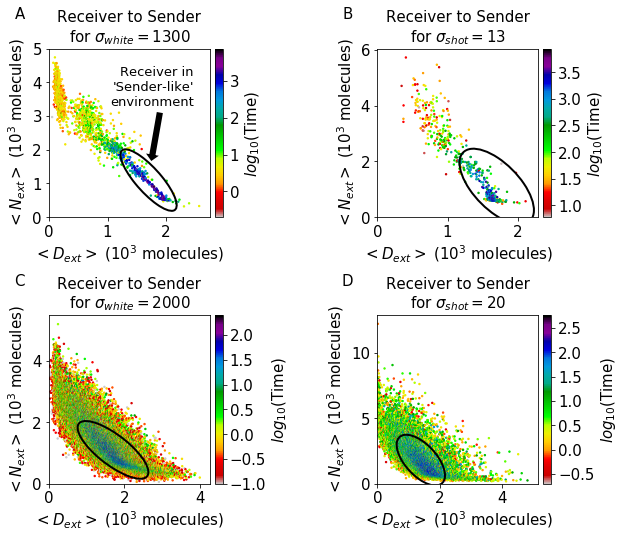

In [32]:
fig = plt.figure(figsize=(9,8))#15,15))
gs1 = gridspec.GridSpec(3, 5, width_ratios=[2,0.1,1.8,2,0.1], height_ratios=[1,0.5,1])
gs1.update(wspace=0.05,hspace=0.05)
fs =15
matplotlib.rcParams.update({'font.size':fs})


ax1e = plt.subplot(gs1[0, 0])
ax1f = plt.subplot(gs1[0, 3])
ax1g = plt.subplot(gs1[2, 0])
ax1h = plt.subplot(gs1[2, 3])

cbax1e=plt.subplot(gs1[0,1])
cbax1f=plt.subplot(gs1[0,4])
cbax1g=plt.subplot(gs1[2,1])
cbax1h=plt.subplot(gs1[2,4])

######
a,b,c=get_etavg_A()
a1e=ax1e.scatter(a/1000.,b/1000.,c=np.log10(c),s=2,cmap='nipy_spectral_r',rasterized=True)
a,b,c=get_etavg_B()
a1f=ax1f.scatter(a/1000.,b/1000.,c=np.log10(c),s=2,cmap='nipy_spectral_r',rasterized=True)
######
a,b,c=get_etavg_C()
a1g=ax1g.scatter(a/1000.,b/1000.,c=np.log10(c),s=2,cmap='nipy_spectral_r',rasterized=True)
a,b,c=get_etavg_D()
a1h=ax1h.scatter(a/1000.,b/1000.,c=np.log10(c),s=2,cmap='nipy_spectral_r',rasterized=True)

cb = matplotlib.colorbar.Colorbar(ax = cbax1e, mappable = a1e)
cb.set_label(r'$log_{10}$(Time)')
cb = matplotlib.colorbar.Colorbar(ax = cbax1f, mappable = a1f)
cb.set_label(r'$log_{10}$(Time)')
cb = matplotlib.colorbar.Colorbar(ax = cbax1g, mappable = a1g)
cb.set_label(r'$log_{10}$(Time)')
cb = matplotlib.colorbar.Colorbar(ax = cbax1h, mappable = a1h)
cb.set_label(r'$log_{10}$(Time)')

ax1e.set_title("Receiver to Sender\nfor $\sigma_{white}=1300$",fontsize=fs)
ax1f.set_title("Receiver to Sender\nfor $\sigma_{shot}=13$",fontsize=fs)
ax1g.set_title("Receiver to Sender\nfor $\sigma_{white}=2000$",fontsize=fs)
ax1h.set_title("Receiver to Sender\nfor $\sigma_{shot}=20$",fontsize=fs)

ax1g.set_ylabel("$<N_{ext}>$ (10$^3$ molecules)")
ax1e.set_ylabel("$<N_{ext}>$ (10$^3$ molecules)")
ax1f.set_ylabel("$<N_{ext}>$ (10$^3$ molecules)")
ax1h.set_ylabel("$<N_{ext}>$ (10$^3$ molecules)")
ax1e.set_xlabel("$<D_{ext}>$ (10$^3$ molecules)")
ax1f.set_xlabel("$<D_{ext}>$ (10$^3$ molecules)")
ax1g.set_xlabel("$<D_{ext}>$ (10$^3$ molecules)")
ax1h.set_xlabel("$<D_{ext}>$ (10$^3$ molecules)")


ax1e.text(-0.15, 1.25, 'A',transform=ax1e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1f.text(-0.15, 1.25, 'B',transform=ax1f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1g.text(-0.15, 1.25, 'C',transform=ax1g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1h.text(-0.15, 1.25, 'D',transform=ax1h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


#### sigma_white=130
width,height=2,0.5
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)
ax1e.fill(x, y, alpha=0, facecolor='white', edgecolor='white', zorder=1)
xcenter,ycenter=1.7,1.1
angle=-65
e2 = matplotlib.patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax1e.add_patch(e2)

### sigma_shot=13
width,height=2.8,0.8
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)
ax1f.fill(x, y, alpha=0, facecolor='white', edgecolor='white', zorder=1)
xcenter,ycenter=1.700,1.1
angle=-75
e2 = matplotlib.patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax1f.add_patch(e2)

#### sigma_white=200
width,height=2.5,0.9
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)
ax1g.fill(x, y, alpha=0, facecolor='white', edgecolor='white', zorder=1)
xcenter,ycenter=1.7,1.1
angle=-45
e2 = matplotlib.patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax1g.add_patch(e2)

### sigma_shot=20
width,height=4,1.2
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)
ax1h.fill(x, y, alpha=0, facecolor='white', edgecolor='white', zorder=1)
xcenter,ycenter=1.4,1.8
angle=-75
e2 = matplotlib.patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax1h.add_patch(e2)

ax1e.set_xlim(xmin=0)
ax1e.set_ylim(ymin=0)
ax1f.set_xlim(xmin=0)
ax1f.set_ylim(ymin=0)
ax1g.set_xlim(xmin=0)
ax1g.set_ylim(ymin=0)
ax1h.set_xlim(xmin=0)
ax1h.set_ylim(ymin=0)

st = "  "
for i in range(11):
    st+="      "
ax1e.text(1.75,3, st, size=2, rotation = 80,bbox=dict(boxstyle="larrow", fc="black", ec="k", lw=4))
ax1e.text(0.9, 0.9, "Receiver in\n'Sender-like'\nenvironment",transform=ax1e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs-2)

fig.tight_layout()
fig.savefig("Figure5.eps",bbox_inches='tight',format='eps',dpi=300)